# PHYS591000 in 2022
# Lab 10
---
## Introduction 
In lab 10, you will learn different kind of CNN structure and compare them.  
* (LeNet)  
* AlexNet  
* VGGNet  
* Inception(GooLeNet)  
* ResNet  

We will use the same dataset to train the models and see the performance of different models.  

> **Useful Reference**
> 1. [AlexNet](https://www.nvidia.cn/content/tesla/pdf/machine-learning/imagenet-classification-with-deep-convolutional-nn.pdf)  
> 2. [VGGNet](https://arxiv.org/pdf/1409.1556.pdf)  
> 3. [Inception](https://arxiv.org/abs/1409.4842)
> 4. [ResNet](https://arxiv.org/pdf/1512.03385.pdf)  
> 5. [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)   

---
## Data Introduction  
[17 Category Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/17/)  

---

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Lab 10
---

### 1.0 Load Data
* Load the oxflower dataset.  
    * x for image, y for label.  

**Please just run this cell to collect training and testing dataset.**

In [16]:
##############################################################################
# Code for 1.0
##############################################################################
# import
!pip install tflearn
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split

#Load oxflower17 dataset
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

##############################################################################

### 1.1 Visulize the dataset  
* Print out the data shape.  
* List the filenames in `./17flowers/jpg/` by os.listdir.  
* Show the first image in each file.  
    * Use matplotlib.image and matplotlib.pyplot.imshow.  
    * Add the title is better.  

[Ref: os.listdir](https://www.tutorialspoint.com/python/os_listdir.htm)

X train shape is : (1088, 224, 224, 3)
X test shape is : (272, 224, 224, 3)
y train shape is : (1088, 17)
y test shape is : (272, 17)


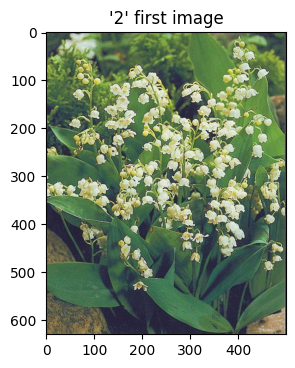

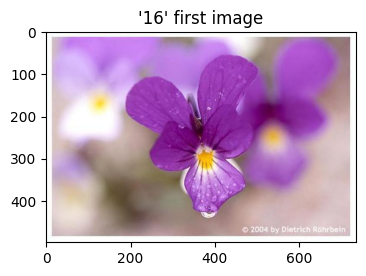

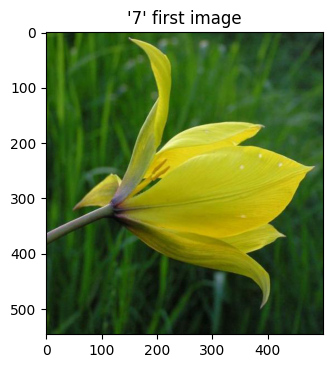

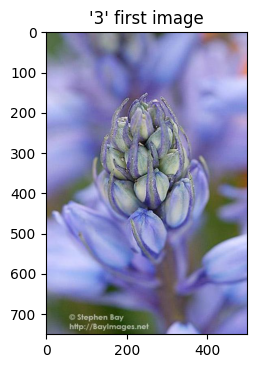

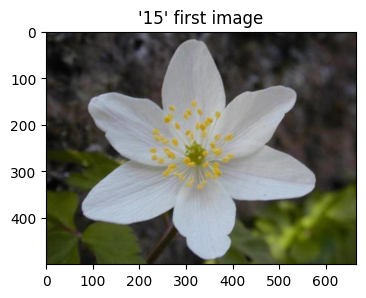

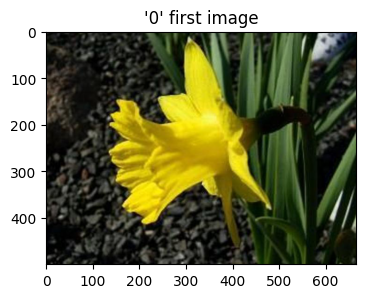

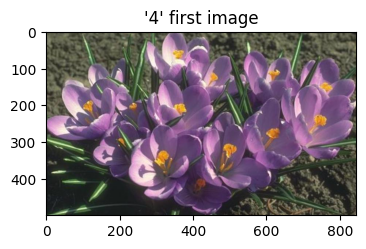

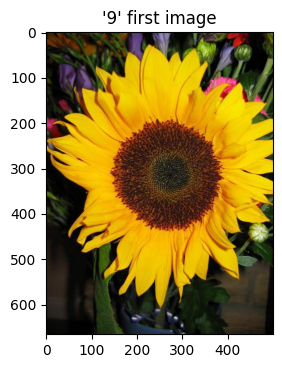

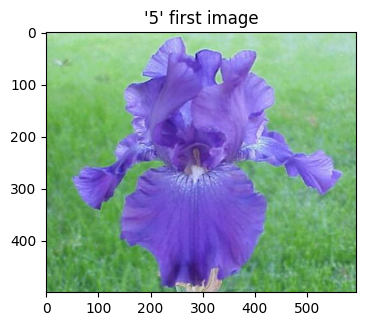

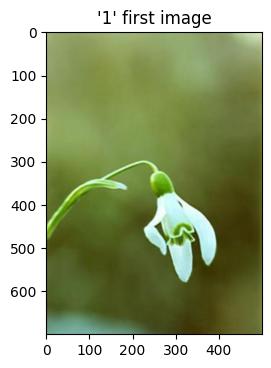

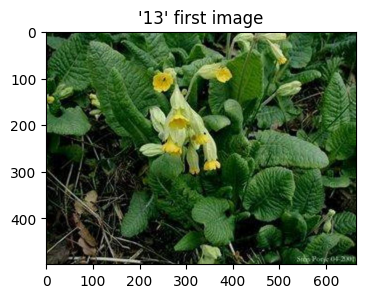

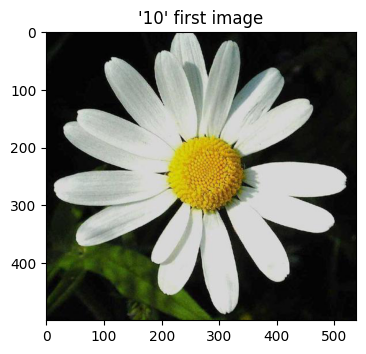

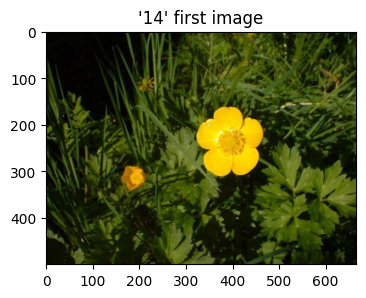

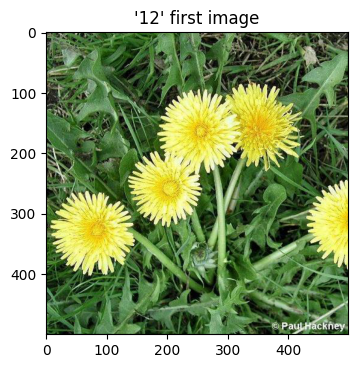

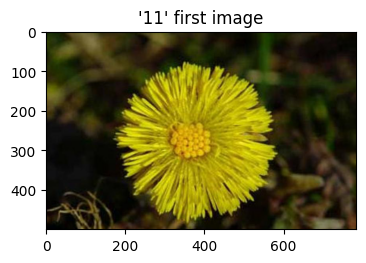

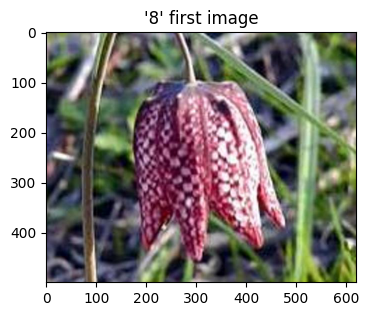

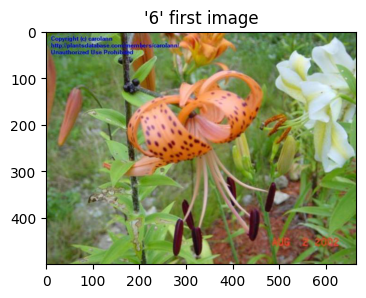

In [17]:
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell
import matplotlib.pyplot as plt
import matplotlib.image as img

print(f'X train shape is : {X_train.shape}')
print(f'X test shape is : {X_test.shape}')
print(f'y train shape is : {y_train.shape}')
print(f'y test shape is : {y_test.shape}')

path = './17flowers/jpg/'

for each_file in os.listdir(path):
    if os.path.isdir(path+each_file):
        image = img.imread(path+each_file+'/'+os.listdir(path+each_file)[0])
        fig = plt.figure(figsize=(4,4), dpi=100)
        plt.imshow(image)
        plt.title(f"'{each_file}' first image")
        plt.show()
        
##############################################################################

### 1.2 ImageDataGenerator  
* Load the image of `./17flowers/jpg/0/image_0027.jpg`.  
    * Load the image by keras.preprocessing.image.load_img().  
    * Turn it to array.  
    * Expand it by axis=0 by np.expand_dims.  
    * Rescale by 1/255.  
* Plot the original image.  
* Set the ImageDataGenerator  
    * rescale=1./255  
    * shear_range=0.2  
    * zoom_range=0.2  
    * horizontal_flip=True  
* Make the augmentation data by ImageDataGenerator.flow  
    * The image should be rescale to before normalization.  
    * batch_size = 4  
* Show the augmentation images.  
    * There should be 4 images.  

load image :<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=667x500 at 0x7F5AFA6281D0>
image array : (500, 667, 3)


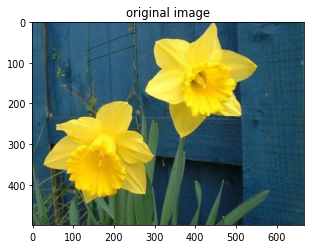

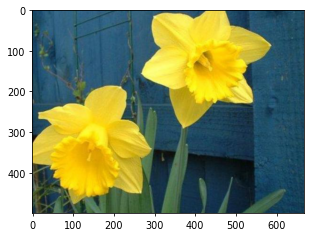

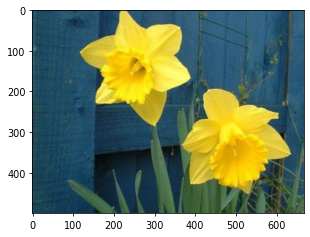

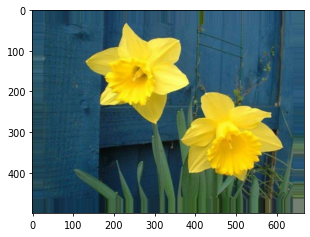

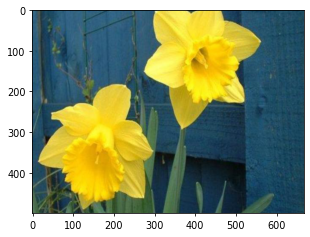

In [18]:
#############################################################################
# Code for 1.2
# 
#############################################################################
# Please code in this cell
import tensorflow as tf
import keras

image = keras.preprocessing.image.load_img('./17flowers/jpg/0/image_0027.jpg')
print(f'load image :{image}')
img_array = tf.keras.preprocessing.image.img_to_array(image)
print(f'image array : {img_array.shape}')
img = np.expand_dims(img_array, axis=0)/255.

fig = plt.figure(figsize=(5,5), dpi=70)
plt.imshow(img[0])
plt.title(f'original image')

IDG = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    )

x = IDG.flow(img, batch_size=4)
for i in range(4):
    fig = plt.figure(figsize=(5,5), dpi=70)
    image = next(x)[0]
    image = image*255
    plt.imshow(image)
plt.show()
#############################################################################

### 1.3 AlexNet with oxflower17 dataset  

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Data Augmentation  
* Please make the augmentation data `img_gen` by Keras tool `ImageDataGenerator`.  
    * rescale=1./255,  
    * shear_range=0.2,  
    * zoom_range=0.2,  
    * horizontal_flip=True  

Bulid a AlexNet model and Training  

* Please create a CNN architecture as follow.  
    * 2D Convolutional layer (filters=96, kernel_size=(11, 11), strides=(4, 4),input_shape = (224,224,3)) ->  
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->   
        2D Convolutional layer (filters=256, kernel_size=(5, 5), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->  
        2D Convolutional layer (filters=384, kernel_size=(3, 3), strides=(1, 1)) -> 
        2D Convolutional layer (filters=384, kernel_size=(3, 3), strides=(1, 1)) -> 
        2D Convolutional layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) -> 
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->  
        Flatten ->    
        Dense layer with 4096 neurons ->   
        Dropout layer(0.5) ->  
        Dense layer with 4096 neurons ->   
        Dropout layer(0.5) ->  
        Dense layer with 1000 neurons ->   
        Dropout layer(0.5) ->  
        Output Dense layer with (number of classes) neuron 

* **RELU** will be activation function for each hidden layer, and **softmax** will be the activation function for output layer.
* `Adam` will be the optimizer with (lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08) and `categorical_crossentropy` will be the loss function.
* Please visualize or print your Architecture.  
* Please set verbose=0.  
* Please train your DNN model with `batch_size=16` and `epochs=60`.
    * x = X_train, 
    * y = y_train,  
    * validation_data= (X_test,y_test)  
* Please save your model and name it to be `model_AlexNet.h5`.
* Please use `.fit_generator` not `.fit`.  



[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)        
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Softmax function in Wiki](https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0)   
[Ref: Adam Keras api ](https://keras.io/api/optimizers/adam/)   
[Ref: Categorical Crossentropy Keras api ](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy)  
[Ref: keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)  

In [20]:
#############################################################################
# Code for 1.3
# 
#############################################################################
# Please code in this cell

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adadelta, Adam

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rescale=1./255,
        horizontal_flip=True
        )

model = Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), 
                 activation='relu', input_shape=(224,224,3), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Conv2D(256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])

model.summary()

Alex = model.fit(img_gen.flow(X_train*255, y_train, batch_size=16),
          validation_data=(X_test, y_test), epochs=60, verbose=0)

model.save('model_AlexNet.h5')
#############################################################################

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_285 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_286 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_287 (Conv2D)          (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 14, 14, 256)      

### 1.4 Plot the accuracy curve and loss curve for AlexNet
Accuracy Curve

* Please make a accuracy curve of the AlexNet from 1.3
* The x-axis will be **epoch** and y-axis will be **accuracy**.
* You need to put accuracy curve for training and validation in the same figure.
---
Loss Curve

* Please make a loss curve of the AlexNet from 1.3
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put loss curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


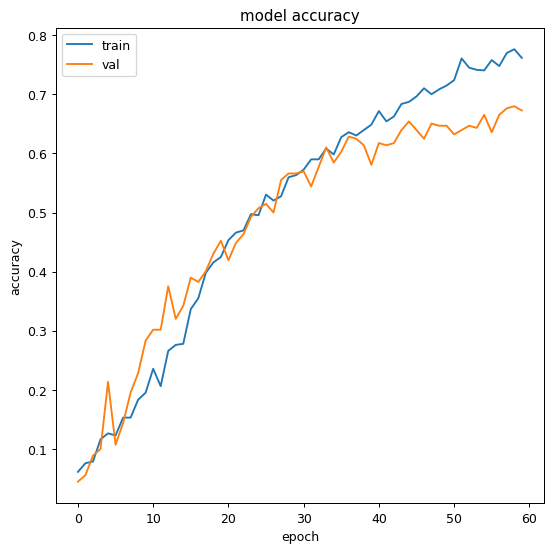

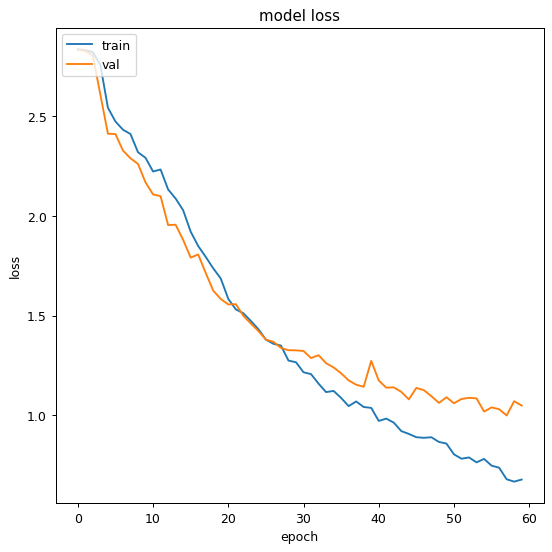

In [21]:
#############################################################################
# Code for 1.4
# 
#############################################################################
# Please code in this cell

print(Alex.history.keys())

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(Alex.history['acc'])
plt.plot(Alex.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(Alex.history['loss'])
plt.plot(Alex.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#############################################################################

### 1.5 VGGNet with oxflower17 dataset

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Data Augmentation  
* Please make the augmentation data `img_gen` by Keras tool `ImageDataGenerator`.  
    * rescale=1./255,  
    * shear_range=0.2,  
    * zoom_range=0.2,  
    * horizontal_flip=True  

Bulid a VGGNet model and Training  

* Please create a CNN architecture as follow.  
    * 2D Convolutional layer (filters=64, kernel_size=(3, 3), strides=(1, 1),input_shape = (224,224,3)) ->  
        2D Convolutional layer (filters=64, kernel_size=(3, 3), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(2, 2)) ->   
        2D Convolutional layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(2, 2)) ->   
        2D Convolutional layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(2, 2)) ->   
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(2, 2)) ->   
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(2, 2)) ->   
        Flatten ->    
        Dense layer with 4096 neurons ->   
        Dropout layer(0.5) ->  
        Dense layer with 4096 neurons ->   
        Dropout layer(0.5) ->  
        Dense layer with 1000 neurons ->   
        Dropout layer(0.5) ->  
        Output Dense layer with (number of classes) neuron 

* **RELU** will be activation function for each hidden layer, and **softmax** will be the activation function for output layer.
* `Adam` will be the optimizer with (lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08) and `categorical_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please set verbose=0.  
* Please train your DNN model with `batch_size=16` and `epochs=60`.
    * x = X_train, 
    * y = y_train,  
    * validation_data= (X_test,y_test)  
* Please save your model and name it to be `model_VGGNet.h5`.
* Please use `.fit_generator` not `.fit`.  



[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)        
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Softmax function in Wiki](https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0)   
[Ref: Adam Keras api ](https://keras.io/api/optimizers/adam/)   
[Ref: Categorical Crossentropy Keras api ](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy)  
[Ref: keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)  

In [22]:
#############################################################################
# Code for 1.5
# 
#############################################################################
# Please code in this cell

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), 
                 activation='relu', input_shape=(224,224,3), padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Conv2D(256, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(256, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(256, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(Conv2D(512, kernel_size=(3,3), strides=(1,1),
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1000, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(17, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])

model2.summary()

VGGNet = model2.fit(img_gen.flow(X_train*255, y_train, batch_size=16),
          validation_data=(X_test, y_test), epochs=60, verbose=0)

model2.save('model_VGGNet.h5')

#############################################################################

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_290 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_294 (Conv2D)          (None, 56, 56, 256)      

### 1.6 Plot the accuracy curve and loss curve for VGGNet  
Accuracy Curve

* Please make a accuracy curve of the VGGNet from 1.5
* The x-axis will be **epoch** and y-axis will be **accuracy**.
* You need to put accuracy curve for training and validation in the same figure.
---
Loss Curve

* Please make a loss curve of the VGGNet from 1.5
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put loss curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


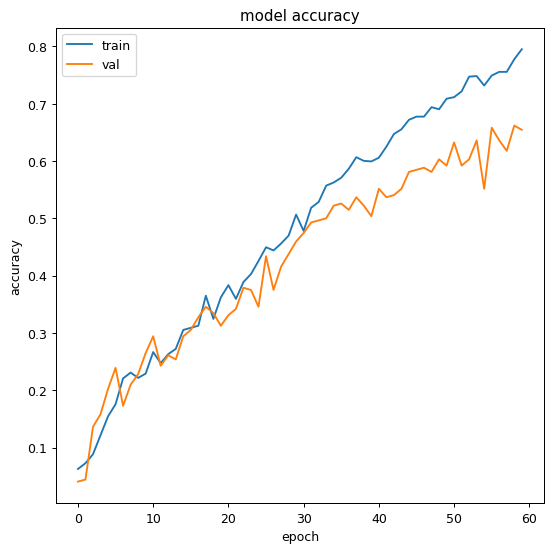

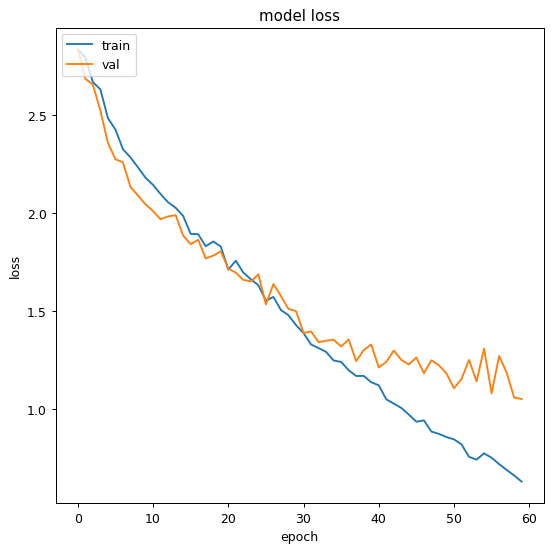

In [23]:
#############################################################################
# Code for 1.6
# 
#############################################################################
# Please code in this cell
print(VGGNet.history.keys())

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(VGGNet.history['acc'])
plt.plot(VGGNet.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(VGGNet.history['loss'])
plt.plot(VGGNet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


#############################################################################

### 1.7 GooLeNet with oxflower17 dataset  

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Data Augmentation  
* Please make the augmentation data `img_gen` by Keras tool `ImageDataGenerator`.  
    * rescale=1./255,  
    * shear_range=0.2,  
    * zoom_range=0.2,  
    * horizontal_flip=True  

Bulid a GooLeNet model and Training  

* Please create a CNN architecture as follow.  
    * 2D Convolutional layer (filters=64, kernel_size=(7, 7), strides=(2, 2),input_shape = (224,224,3)) ->  
        BatchNormalization layer (axis=3) ->  
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->   
        2D Convolutional layer (filters=192, kernel_size=(7, 7), strides=(2, 2)) ->  
        BatchNormalization layer (axis=3) ->  
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->   

        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=96, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=16, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=192, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=96, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->

        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->  

        2D Convolutional layer (filters=192, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=96, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=208, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=16, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=48, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=160, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=112, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=224, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=24, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=24, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=112, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=144, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=288, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=64, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=256, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=160, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=320, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->

        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->  

        2D Convolutional layer (filters=256, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=160, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=320, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=32, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->

        2D Convolutional layer (filters=384, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=192, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=384, kernel_size=(3, 3), strides=(1, 1)) ->
        2D Convolutional layer (filters=48, kernel_size=(1, 1), strides=(1, 1)) ->
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) ->
        MaxPooling layer (pool_size=(3, 3), strides=(1, 1)) ->   
        2D Convolutional layer (filters=128, kernel_size=(1, 1), strides=(1, 1)) -> 

        2D AveragePooling layer (pool_size=(7,7),strides=(7,7)) ->  
        Flatten ->    
        Dropout layer(0.4) ->  
        Dense layer with 1000 neurons ->   
        Output Dense layer with (number of classes) neuron 
    ```
    * Hint: You can define function to make the code easier.  
    ```

* **RELU** will be activation function for each hidden layer, and **softmax** will be the activation function for output layer.
* `Adam` will be the optimizer with (lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08) and `categorical_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please set verbose=0.  
* Please train your DNN model with `batch_size=16` and `epochs=60`.
    * x = X_train, 
    * y = y_train,  
    * validation_data= (X_test,y_test)  
* Please save your model and name it to be `model_GooLeNet.h5`.
* Please use `.fit_generator` not `.fit`.  



[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)        
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Softmax function in Wiki](https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0)   
[Ref: Adam Keras api ](https://keras.io/api/optimizers/adam/)   
[Ref: Categorical Crossentropy Keras api ](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy)  
[Ref: keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)  
[Ref: BatchNormalization layer](https://keras.io/api/layers/normalization_layers/batch_normalization/)  
[Ref: tf.keras.layers.AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)  

In [25]:
#############################################################################
# Code for 1.7
# 
#############################################################################
# Please code in this cell

def simple_inception(x, para1, para2, para3, para4):

    path1  = Conv2D(para1[0], kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(x)
    
    path2  = Conv2D(para2[0], kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(x)
    path2  = Conv2D(para2[1], kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(path2) 
        
    path3  = Conv2D(para3[0], kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(x)               
    path3  = Conv2D(para3[1], kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(path3)
        
    path4  = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)     
    path4  = Conv2D(para4[0], kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(path4)
    
    output_layer = concatenate([path1, path2, path3, path4], axis = -1)
    
    return output_layer
    
def GoogLeNet(input_shape=None):
    
    img_input = keras.layers.Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7,7), strides=(2,2), activation='relu', padding='same')(img_input)
    x = BatchNormalization(axis=3)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    x = Conv2D(192, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    
    x = simple_inception(x, (64,), (96, 128), (16, 32), (32,))
    x = simple_inception(x, (128,), (128, 192), (32, 96), (64,))

    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = simple_inception(x, (192,), (96, 208), (16, 48), (64,))
    x = simple_inception(x, (160,), (112, 224), (24, 64), (64,))
    x = simple_inception(x, (128,), (128, 256,), (24, 64), (64,))
    x = simple_inception(x, (112,), (144, 288,), (32, 64), (64,))
    x = simple_inception(x, (256,), (160, 320,), (32, 128), (128,))

    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    x = simple_inception(x, (256,), (160, 320), (32, 128), (128,))
    x = simple_inception(x, (384,), (192, 384), (48, 128), (128,))

    x = AveragePooling2D(pool_size=(7,7), strides=(7,7), padding='same')(x)    
    
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000, activation='relu')(x)
    x = Dense(17, activation='softmax')(x)

    model = keras.models.Model(img_input, x, name='GoogLeNet')

    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])
    
    return model

model3 = GoogLeNet(input_shape=(224,224,3))
model3.summary()

googlenet = model3.fit(img_gen.flow(X_train*255, y_train, batch_size=16),
          validation_data=(X_test, y_test), epochs=60, verbose=0)

model3.save('model_GoogLeNet.h5')

#############################################################################

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_303 (Conv2D)             (None, 112, 112, 64) 9472        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 112, 112, 64) 256         conv2d_303[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_76 (MaxPooling2D) (None, 56, 56, 64)   0           batch_normalization_10[0][0]     
__________________________________________________________________________________________

### 1.8 Plot the accuracy curve and loss curve for GooLeNet  
Accuracy Curve

* Please make a accuracy curve of the GooLeNet from 1.7
* The x-axis will be **epoch** and y-axis will be **accuracy**.
* You need to put accuracy curve for training and validation in the same figure.
---
Loss Curve

* Please make a loss curve of the GooLeNet from 1.7
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put loss curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


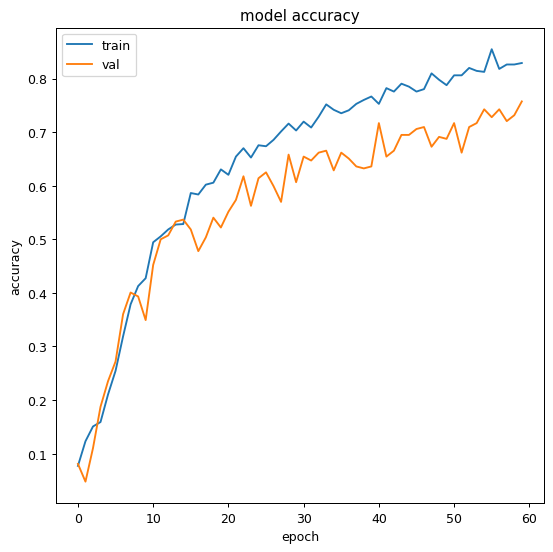

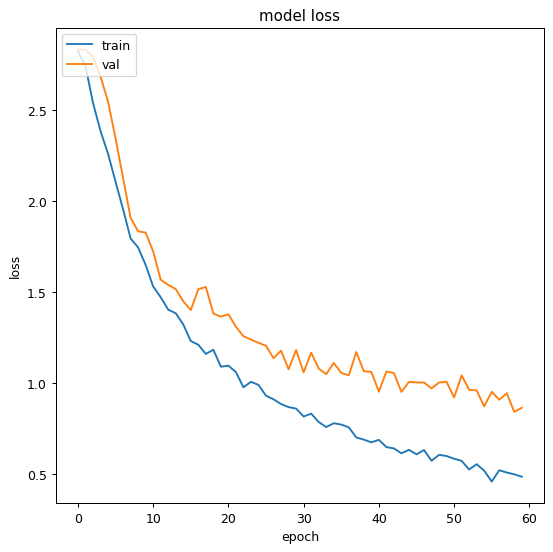

In [26]:
#############################################################################
# Code for 1.8
# 
#############################################################################
# Please code in this cell

print(googlenet.history.keys())

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(googlenet.history['acc'])
plt.plot(googlenet.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(googlenet.history['loss'])
plt.plot(googlenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


#############################################################################

### 1.9 ResNet with oxflower17 dataset  

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Data Augmentation  
* Please make the augmentation data `img_gen` by Keras tool `ImageDataGenerator`.  
    * rescale=1./255,  
    * shear_range=0.2,  
    * zoom_range=0.2,  
    * horizontal_flip=True  

Bulid a ResNet model and Training  

* Please create a CNN architecture as follow.  
    * Conv2d_BN layer (filters=64, kernel_size=(7, 7), strides=(2, 2),input_shape = (224,224,3)) ->  
        MaxPooling layer (pool_size=(3, 3), strides=(2, 2)) ->   
        Residual_Block layer (filters=64, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=64, kernel_size=(3, 3), strides=(1, 1)) ->
        Residual_Block layer (filters=64, kernel_size=(3, 3), strides=(1, 1)) ->
        Residual_Block layer (filters=128, kernel_size=(3, 3), strides=(2, 2),with_conv_shortcut=True) ->
        Residual_Block layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=128, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(2, 2),with_conv_shortcut=True) ->
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=256, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=512, kernel_size=(3, 3), strides=(2, 2),with_conv_shortcut=True) ->
        Residual_Block layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->  
        Residual_Block layer (filters=512, kernel_size=(3, 3), strides=(1, 1)) ->  
        2D AveragePooling layer (pool_size=(7,7),strides=(7,7)) ->  
        Flatten ->    
        Dropout layer(0.4) ->  
        Dense layer with 1000 neurons ->   
        Output Dense layer with (number of classes) neuron 
    ```
    * Hint: You can use function we gave to make the code easier.  
    ```

* **RELU** will be activation function for each hidden layer, and **softmax** will be the activation function for output layer.
* `Adam` will be the optimizer with (lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08) and `categorical_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please set verbose=0.  
* Please train your DNN model with `batch_size=16` and `epochs=60`.
    * x = X_train, 
    * y = y_train,  
    * validation_data= (X_test,y_test)  
* Please save your model and name it to be `model_GooLeNet.h5`.
* Please use `.fit_generator` not `.fit`.  



[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)        
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Softmax function in Wiki](https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0)   
[Ref: Adam Keras api ](https://keras.io/api/optimizers/adam/)   
[Ref: Categorical Crossentropy Keras api ](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy)  
[Ref: keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)  
[Ref: BatchNormalization layer](https://keras.io/api/layers/normalization_layers/batch_normalization/)  
[Ref: tf.keras.layers.AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)  

In [27]:
#############################################################################
# Code for 1.9
#
#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Residual Block for ResNet34(2 convolution layers)
def Residual_Block(input_model,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut =False):
    x = Conv2d_BN(input_model,nb_filter=nb_filter,kernel_size=kernel_size,strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size,padding='same')
    
    #need convolution on shortcut for add different channel
    if with_conv_shortcut:
        shortcut = Conv2d_BN(input_model,nb_filter=nb_filter,strides=strides,kernel_size=kernel_size)
        x = Add()([x,shortcut])
        return x
    else:
        x = Add()([x,input_model])
        return x 
#############################################################################
# Please code in this cell

def ResNet(input_shape=None):
    img_input = keras.layers.Input(shape=input_shape)
    x = Conv2d_BN(x=img_input, nb_filter=64, kernel_size=(7,7), strides=(2,2))
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
           
    x = Residual_Block(input_model=x, nb_filter=64, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=64, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=64, kernel_size=(3,3))

    x = Residual_Block(input_model=x, nb_filter=128, kernel_size=(3,3), strides=(2,2), with_conv_shortcut=True)
    x = Residual_Block(input_model=x, nb_filter=128, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=128, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=128, kernel_size=(3,3))

    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3), strides=(2,2), with_conv_shortcut=True)
    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=256, kernel_size=(3,3))

    x = Residual_Block(input_model=x, nb_filter=512, kernel_size=(3,3), strides=(2,2), with_conv_shortcut=True)
    x = Residual_Block(input_model=x, nb_filter=512, kernel_size=(3,3))
    x = Residual_Block(input_model=x, nb_filter=512, kernel_size=(3,3))
    
    x = AveragePooling2D(pool_size=(7,7), strides=(7,7))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000, activation='relu')(x)
    x = Dense(17, activation='softmax')(x)

    model = keras.models.Model(img_input, x, name='ResNet')

    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])
    return model

model4 = ResNet(input_shape=(224,224,3))
model4.summary()

resnet = model4.fit(img_gen.flow(X_train*255, y_train, batch_size=16),
          validation_data=(X_test, y_test), epochs=60, verbose=0)

model4.save('model_ResNet.h5')


#############################################################################

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_359 (Conv2D)             (None, 112, 112, 64) 9472        input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 112, 112, 64) 256         conv2d_359[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_89 (MaxPooling2D) (None, 56, 56, 64)   0           batch_normalization_12[0][0]     
_____________________________________________________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


### 1.10 Plot the accuracy curve and loss curve for ResNet  
Accuracy Curve

* Please make a accuracy curve of the ResNet from 1.10
* The x-axis will be **epoch** and y-axis will be **accuracy**.
* You need to put accuracy curve for training and validation in the same figure.
---
Loss Curve

* Please make a loss curve of the ResNet from 1.10
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put loss curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


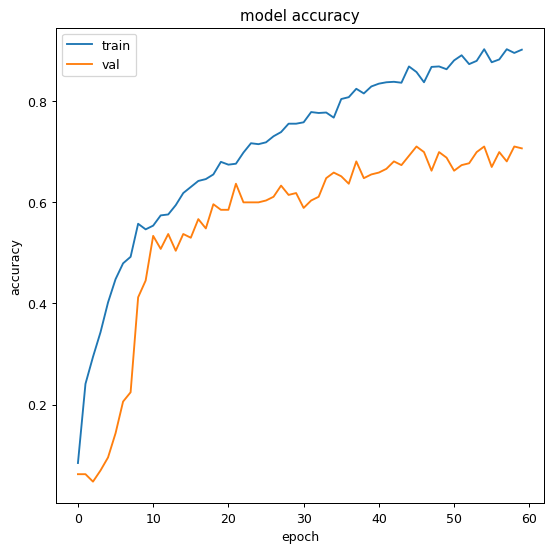

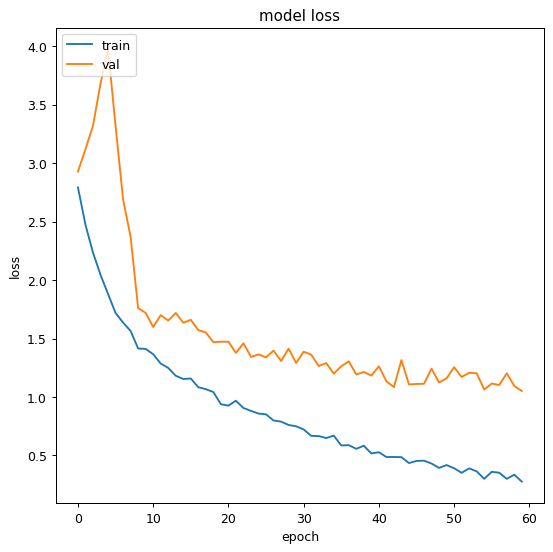

In [28]:
#############################################################################
# Code for 1.10
# 
#############################################################################
# Please code in this cell

print(resnet.history.keys())

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(resnet.history['acc'])
plt.plot(resnet.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7), dpi=90)
plt.plot(resnet.history['loss'])
plt.plot(resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



#############################################################################

### 1.11
Discussion for 1.3-1.10

According to the accuracy curve and loss curve, please try your best to commnet on the difference and performance of AlexNet, VGGNet, Inception and ResNet.

---
Please write your discussion in this cell:     


First, let's see AlexNet, its has fewer layers and the accuracy and loss curve is similar to previous homework, a 'not so bad' model to get roughly accurate result. Compare to the next model, VGGNet, we found that the ROC curve area in VGGNet is lesser than AlexNet, it mean AlexNet has more efficient than VGGNet. Moreover, we can see that the parameter in VGGNet is the biggest one, it would need a better hardware as increasing the layer, which would be a challenge on costing. Next, which is GoogLeNet, it has a significantly less parameter than VGG, and very similar to ResNet. Futhermore, the number of layers also increase, it prove that more layers give us more accurate result. Last, for ResNet, the ROC curve area is larger than all other 3 models, also mean a better efficiency, it get roughly 0.6 accuracy in just ~10epochs, although the number of layers are bigger, we should get a conclusion that the more the layers we set, the more the efficiency(But weird on VGGNet).

---